In [683]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

from matplotlib import colors
from ipywidgets import interact

In [684]:
log_path = "logs_635773906979863650"

In [88]:
duration = 1000
start = 0
end = 500

# Input

In [21]:
df = pd.read_csv("%s/input.csv" % log_path, header=None)
dfs = df.gt(0).applymap(lambda x: 1.0 if x else None)

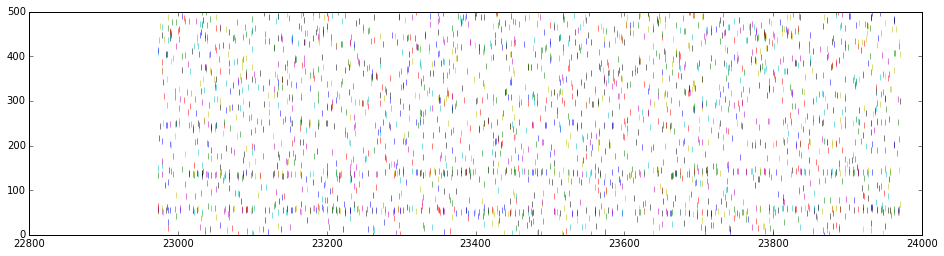

In [22]:
plt.figure(figsize=(16, 4))
for i in dfs.columns[start:end]:
    x = dfs.index[-duration:]
    y = (dfs[i] * i)[-duration:]
    s = dfs[i][:duration].sum()
    plt.plot(x, y, "|")

# Output

In [23]:
df = pd.read_csv("%s/output.csv" % log_path, header=None)
dfs = df.gt(0).applymap(lambda x: 1.0 if x else None)

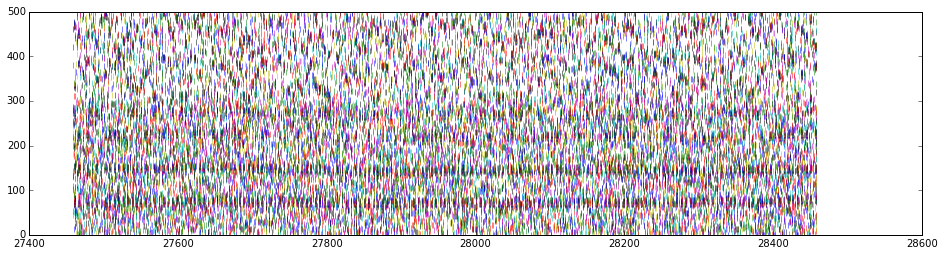

In [24]:
plt.figure(figsize=(16, 4))
for i in dfs.columns[start:end]:
    x = dfs.index[-duration:]
    y = (dfs[i] * i)[-duration:]
    s = dfs[i][:duration].sum()
    plt.plot(x, y, "|")

# Rate

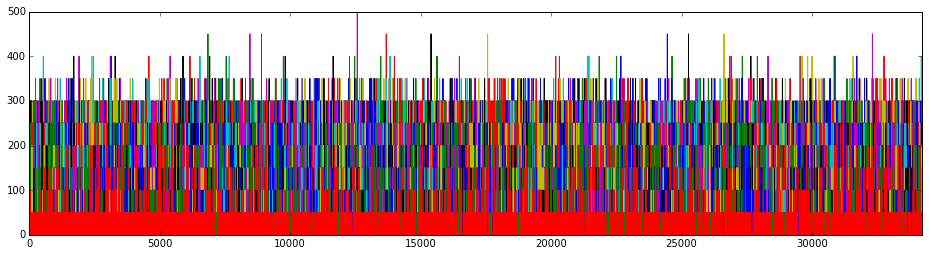

In [26]:
df = pd.read_csv("%s/rate.csv" % log_path, header=None)
df.plot(figsize=(16, 4), legend=False)

# Weights

In [763]:
log_path = "logs_635774070805406190"
df = pd.read_csv("%s/weights.csv" % log_path, header=None)

In [764]:
# there are 120,000 synapses total
# 20,000 for each input layer, going to each output layer, in excitatory+inhibitory pairs
# of those 20,000 are 200 outgoing from each input neuron

input_layer_size = 100
output_layer_size = 100
layer_size = input_layer_size * output_layer_size * 2
input_layer_count = 3
output_layer_count = 2

weight_min = -4
weight_max = 4

input_layer_names = {0: "Shoulder Prop", 1: "Elbow Prop", 2: "Target Dir"}
output_layer_names = {0: "Shoulder Motor Command", 1: "Elbow Motor Command"}

def plot_weights(df):
    def plotter(f):
        w = df.values[f]

        fig, axs = plt.subplots(output_layer_count, input_layer_count, sharex=True, sharey=True, figsize=(16, 16))
        norm = colors.Normalize(vmin=weight_min, vmax=weight_max)

        for i in range(input_layer_count): # iterate input layers
            for j in range(output_layer_count):
                layer_start = (i * output_layer_count + j) * layer_size
                layer_end = layer_start + layer_size
                layer_w = w[layer_start:layer_end]
                layer_w = np.reshape(layer_w, (input_layer_size * 2, output_layer_size))

                ax = axs[j, i]
                ax.set_title("{} => {}".format(input_layer_names[i], output_layer_names[j]))

                im = ax.imshow(layer_w, interpolation='none', cmap='Spectral', aspect='equal', norm=norm)
                ax.grid(False)

        plt.tight_layout()
        fig.colorbar(im, ax=list(axs.ravel()))
    return plotter

None

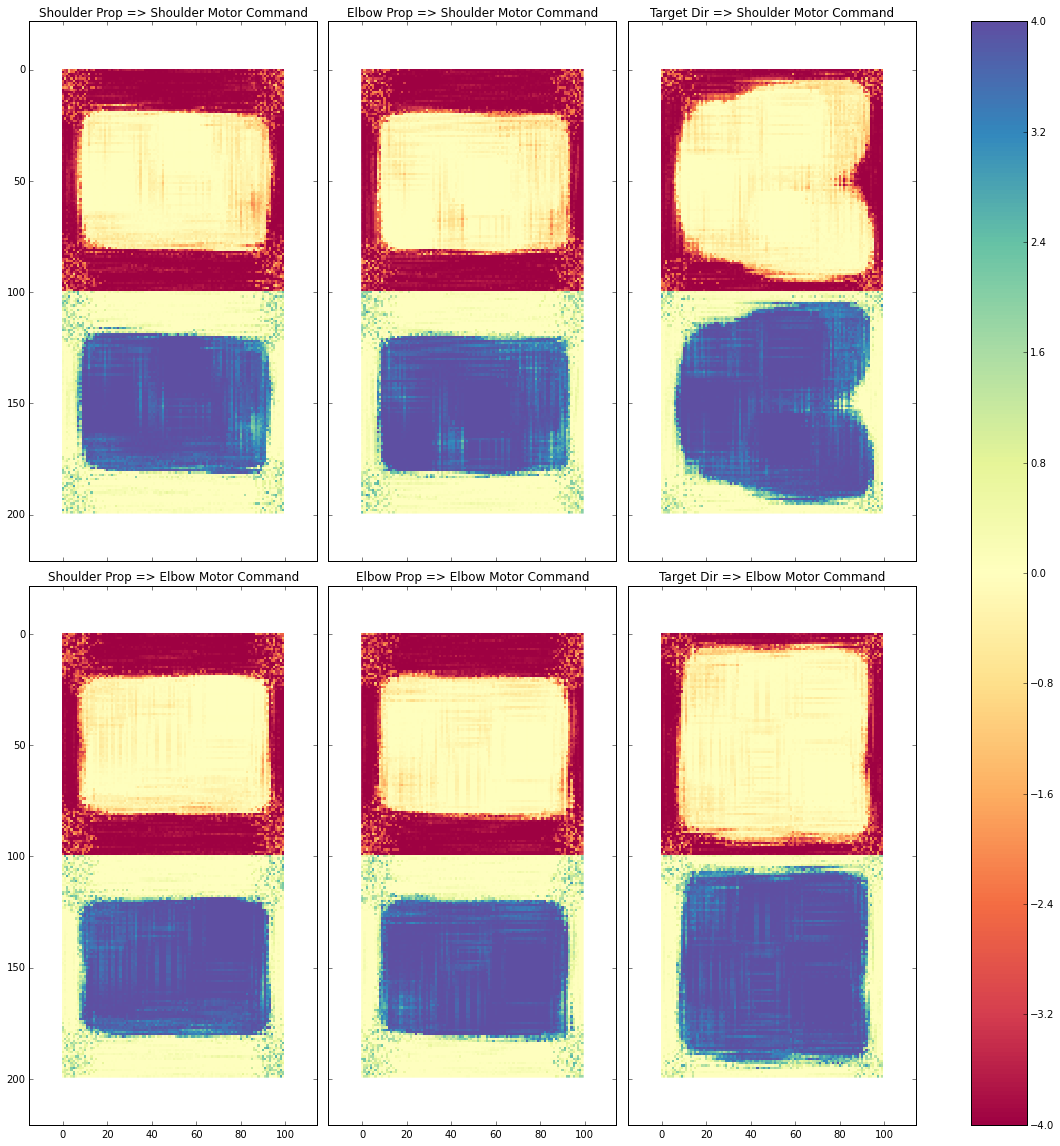

In [765]:
if len(df.values) == 1:
    plot_weights(df)(0)
else:
    _ = interact(plot_weights(df), f=(0, len(df.values) - 1))

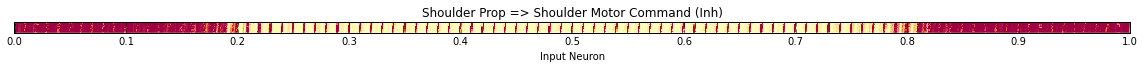

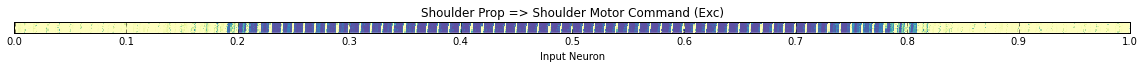

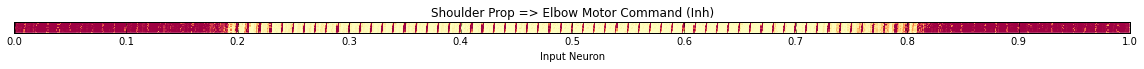

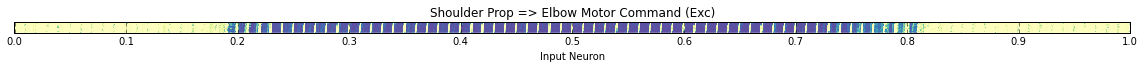

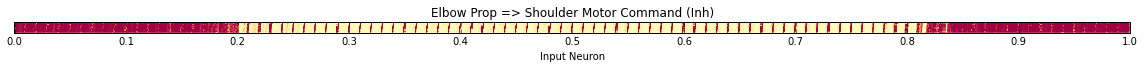

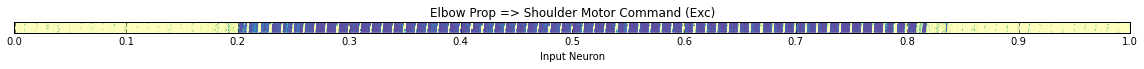

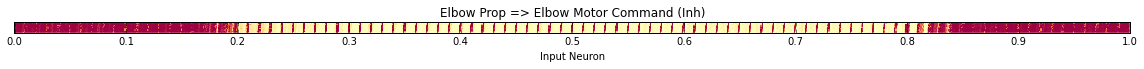

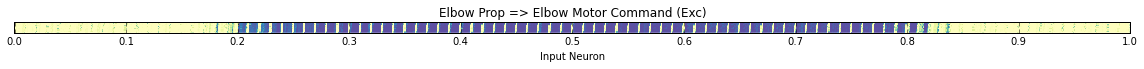

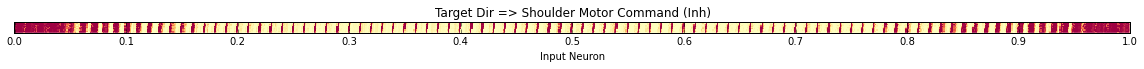

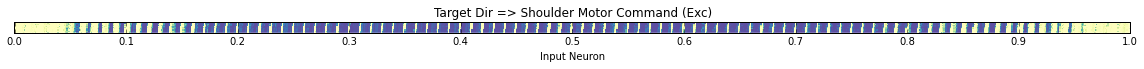

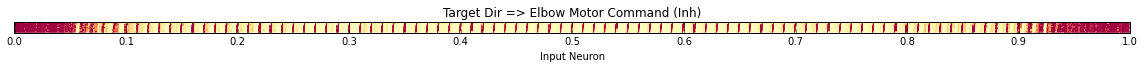

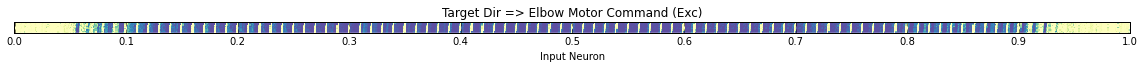

In [760]:
# there are 120,000 synapses total
# 20,000 for each input layer, going to each output layer, in excitatory+inhibitory pairs
# of those 20,000 are 200 outgoing from each input neuron

input_layer_size = 100
output_layer_size = 100
layer_size = input_layer_size * output_layer_size
input_layer_count = 3
output_layer_count = 4

weight_min = -4
weight_max = 4

input_layer_names = {
    0: "Shoulder Prop",
    1: "Elbow Prop",
    2: "Target Dir",
}
output_layer_names = {
    0: "Shoulder Motor Command (Inh)",
    1: "Shoulder Motor Command (Exc)",
    2: "Elbow Motor Command (Inh)",
    3: "Elbow Motor Command (Exc)",
}

w = df.values[-1]

input_layer_id = 0
output_layer_id = 0

def plot_weights(input_layer_id, output_layer_id):
    layer_start = (input_layer_id * output_layer_count + output_layer_id) * layer_size
    layer_end = layer_start + layer_size

    layer_w = w[layer_start:layer_end]
    layer_w = np.reshape(layer_w, (10, 1000), "F")

    norm = colors.Normalize(vmin=weight_min, vmax=weight_max)

    fig = plt.figure(figsize=(16, 16))
    im = plt.imshow(layer_w, interpolation='none', cmap='Spectral', aspect='equal', norm=norm)
    plt.grid(False)
    plt.title("{} => {}".format(input_layer_names[input_layer_id], output_layer_names[output_layer_id]))
    plt.xlabel("Input Neuron")
    plt.xticks(range(0, 1001, 100), [str(i / 100) for i in range(0, 101, 10)])
    plt.yticks([])
    plt.tight_layout()

for i in range(input_layer_count):
    for j in range(output_layer_count):
        plot_weights(i, j)